# ***RANDOM FOREST***

**Objective**

Perform the Random classifier on the **"Glass"** data and implement the bagging and boosting methods on it.

Importing all the required libraries for performing the random forest.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
df=pd.read_excel("glass.xlsx",sheet_name="glass")


**1. Exploratory Data Analysis (EDA):**

In [ ]:
df.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

Displaying the firest five rows of the data set.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Displays the data types of each variable.

In [ ]:
df.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

 Generates a statistical summary of a DataFrame, typically including measures such as count, mean, standard deviation, minimum, quartiles, and maximum for numerical columns. This summary provides an overview of the data's distribution and central tendencies, useful for understanding the dataset's characteristics and identifying potential issues or insights.

In [ ]:
df.duplicated().sum()

np.int64(1)

calculates the total number of duplicate rows in the DataFrame, indicating how many records are repeated and may require removal or further investigation to ensure data quality and integrity.

In [ ]:
df.drop_duplicates(inplace=True)

removes duplicate rows from the DataFrame in place, ensuring that each record is unique and improving data quality by eliminating redundant entries.

In [ ]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Checking whether if there are any null values in the given data or not.

**2: Data Visualization:**

Boxplot

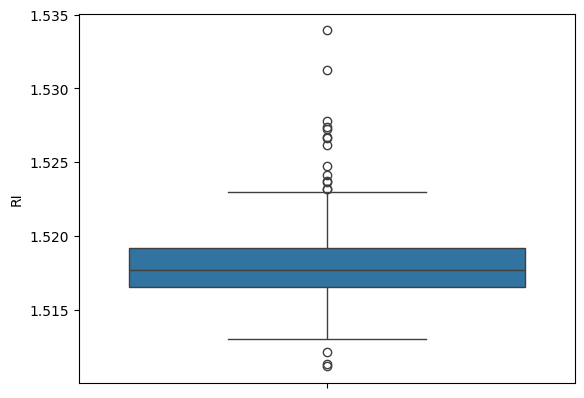

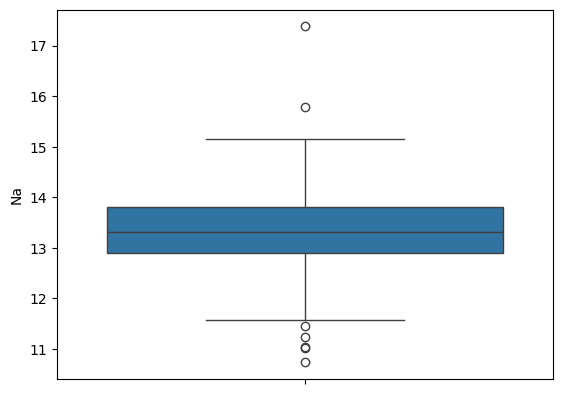

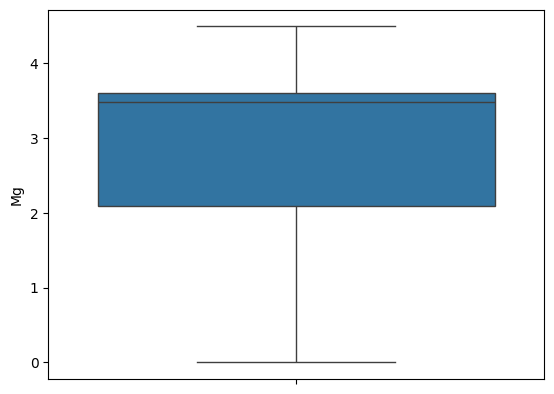

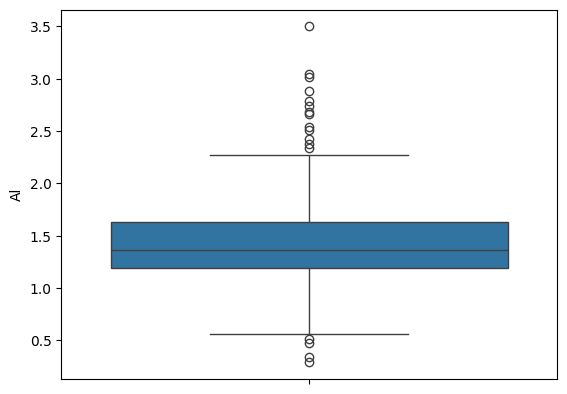

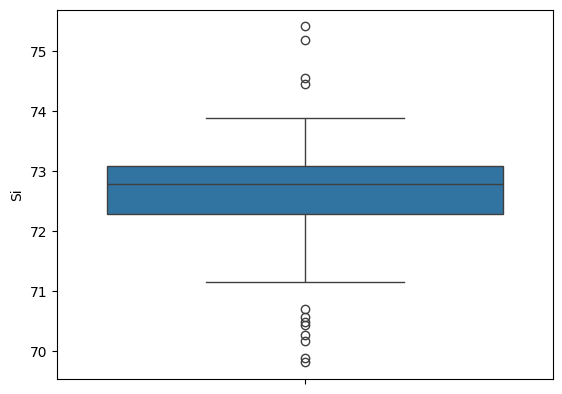

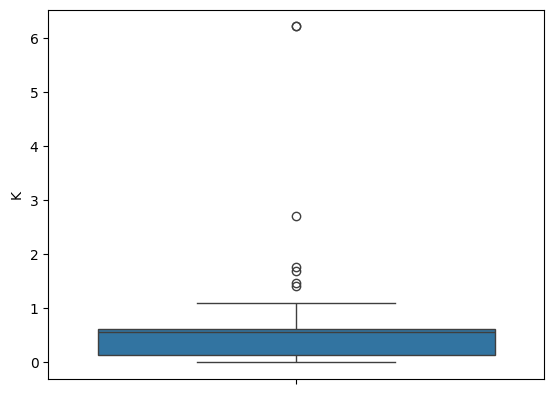

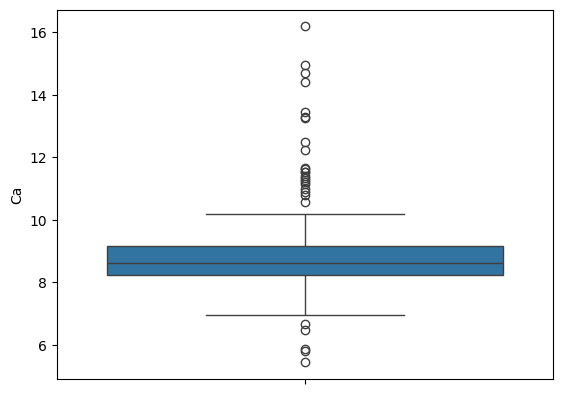

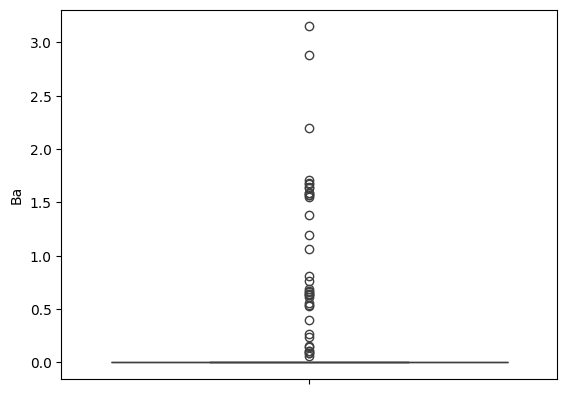

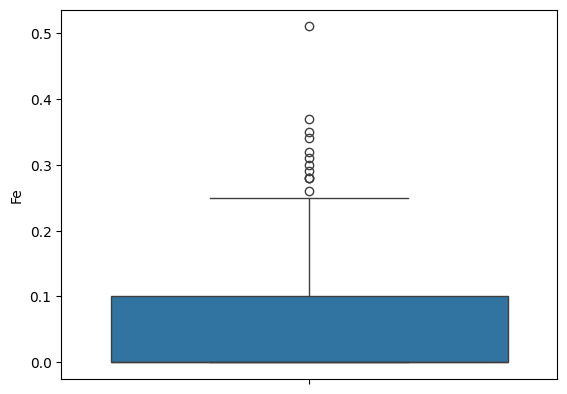

In [ ]:
for i in gl.columns:
  sns.boxplot(df[i])
  plt.show()

Iterates through each column in the DataFrame 'gl', creating and displaying a boxplot for each column to visualize the distribution and identify potential outliers in the data.

Heatmap

<Axes: >

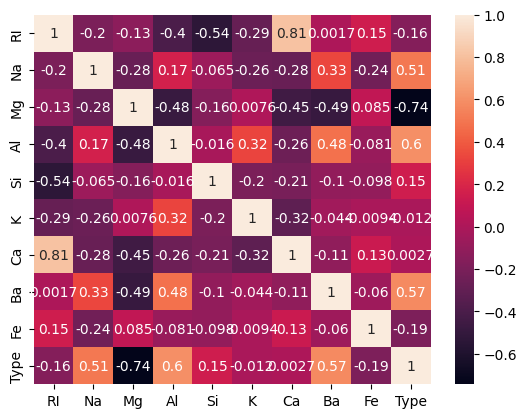

In [ ]:
sns.heatmap(df.corr(),annot=True)

Generates a heatmap to visualize the correlation matrix of the DataFrame 'df', with annotations displaying the correlation coefficients for each pair of variables.

histogram

In [ ]:
df.hist(figsize=(14,10))

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

Creates histograms for each numerical feature in the DataFrame 'df', arranged within a single figure of size 14 by 10 inches to visualize the distribution of the data.

**3: Data Preprocessing**

In [ ]:
x=df.drop("Type",axis=1)
y=df["Type"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

separates the feature variables and target label from the dataset, with features stored in x and labels in y. It then splits the data into training and testing sets, using 20% of the data for testing and a fixed random seed for reproducibility, facilitating model training and evaluation.

In [ ]:
scaler = StandardScaler()
SD = scaler.fit_transform(df)

initializes a standard scaler and applies it to the dataset, standardizing the features by removing the mean and scaling to unit variance, which helps improve the performance of many machine learning algorithms.

In [ ]:
SD=pd.DataFrame(SD,columns=df.columns)

The standardized data stored in SD is converted back into a DataFrame with the original column names, enabling easier interpretation and further analysis of the scaled features.

In [ ]:
SD.head()

RI        Na        Mg        Al        Si         K        Ca  \
0  0.879840  0.289558  1.257238 -0.706370 -1.133248 -0.673480 -0.143466   
1 -0.243816  0.596403  0.639311 -0.180863  0.097037 -0.028962 -0.790201   
2 -0.716412  0.154546  0.604596  0.182950  0.433746 -0.167073 -0.825349   
3 -0.227291 -0.238216  0.701798 -0.322346 -0.058368  0.109149 -0.516041   
4 -0.306608 -0.164573  0.653197 -0.423405  0.550299  0.078457 -0.621487   

         Ba        Fe      Type  
0 -0.353808 -0.588301 -0.851703  
1 -0.353808 -0.588301 -0.851703  
2 -0.353808 -0.588301 -0.851703  
3 -0.353808 -0.588301 -0.851703  
4 -0.353808 -0.588301 -0.851703

**4: Random Forest Model Implementation**

In [ ]:
a=SD.drop("Type",axis=1)
b=df["Type"]
xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.2,random_state=42)

separates features and target variable from the standardized dataset, storing features in a and labels in b. It then splits the data into training and testing sets, with 20% allocated for testing, using a fixed random seed for consistency, facilitating model training and evaluation.

**RANDOM FOREST CLASSIFIER**

In [ ]:
Num_trees = 100
Max_features = 3
kf = KFold(n_splits=10, random_state=7, shuffle=True)
mod = RandomForestClassifier(n_estimators=Num_trees, max_features=Max_features)
res= cross_val_score(mod, xtrain, ytrain, cv=kf)
print(res.mean())

0.7705882352941176


sets up a random forest classifier with 100 trees and a maximum of 3 features considered at each split. It uses 10-fold cross-validation with shuffling to evaluate the model's performance on the training data, then computes and prints the average cross-validation score, providing an estimate of the model's generalization ability.

In [ ]:
mod.fit(xtrain, ytrain)


RandomForestClassifier(max_features=3)

 trains the model using the training data, fitting it to learn patterns and relationships between features and the target variable.

In [ ]:
y_pred = mod.predict(xtest)


uses the trained model to predict the target labels for the test data, generating predicted values for evaluation or further analysis.

In [ ]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.71      0.80      0.75        15
           3       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.81        43
   macro avg       0.88      0.80      0.82        43
weighted avg       0.84      0.81      0.82        43



generates and prints a classification report that summarizes the performance of the model on the test data, including metrics such as precision, recall, F1-score, and support for each class.

Bagging and Boosting Methods

In [ ]:
seed = 7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model_bg = BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model_bg,xtrain, ytrain, cv=kfold)
print(results.mean())

0.7764705882352941


 sets a seed for reproducibility and performs 10-fold cross-validation with shuffling to evaluate a bagging classifier that uses a decision tree as its base estimator. The bagging classifier, comprising 100 trees, is assessed on the training data, and the average cross-validation score is printed, providing an estimate of the ensemble model's overall performance.

In [ ]:
model_bg=BaggingClassifier(random_state=42)
model_bg.fit(xtrain, ytrain)

BaggingClassifier(random_state=42)

Initializes a bagging classifier with a fixed random seed, then trains the ensemble model on the training data to improve stability and accuracy through bootstrap aggregating.

In [ ]:
y_predi=model_bg.predict(xtest)
print(classification_report(ytest, y_predi))


              precision    recall  f1-score   support

           1       0.57      0.80      0.67        10
           2       0.69      0.60      0.64        15
           3       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           6       1.00      0.33      0.50         3
           7       0.89      0.89      0.89         9

    accuracy                           0.72        43
   macro avg       0.82      0.71      0.73        43
weighted avg       0.75      0.72      0.72        43



 uses the trained bagging classifier to predict labels for the test data and then prints a classification report summarizing the model's performance, including metrics such as precision, recall, F1-score, and support for each class.

Boosting method called **ADABOOST**

In [ ]:
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
model_bo= AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
resul= cross_val_score(model_bo, x_train, y_train, cv=kfold)
print(resul.mean())

0.47058823529411764


defines an AdaBoost classifier with 10 estimators and performs 10-fold cross-validation with shuffling to evaluate its performance on the training data. A fixed seed ensures reproducibility, and the average cross-validation score is printed as an estimate of the model’s overall effectiveness.

In [ ]:
model_bo = AdaBoostClassifier(random_state=42)
model_bo.fit(xtrain, ytrain)


AdaBoostClassifier(random_state=42)

initializes an AdaBoost classifier with a fixed random seed and trains the ensemble model on the training data to enhance predictive performance through boosting.

In [ ]:
y_pre = model_bo.predict(xtest)
print(classification_report(ytest, y_pre))

              precision    recall  f1-score   support

           1       0.67      0.20      0.31        10
           2       0.48      0.93      0.64        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.89      0.94         9

    accuracy                           0.60        43
   macro avg       0.52      0.45      0.45        43
weighted avg       0.60      0.60      0.55        43



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Uses the trained AdaBoost classifier to predict labels for the test data and prints a classification report that summarizes the model's performance, including metrics such as precision, recall, F1-score, and support for each class.

If we compare both the cases,Bagging gave better accuracy than Boosting because it combines multiple models trained on different samples to reduce errors and improve stability. Boosting focuses more on correcting mistakes, which can sometimes lead to overfitting if not tuned properly. In general, Bagging works well when the goal is to reduce variance, while Boosting is better when there's a need to reduce bias..

**INTERVIEW QUESTIONS**


**1. Explain Bagging and Boosting methods. How is it different from each other.**
Bagging (Bootstrap Aggregating) is an ensemble learning method that builds multiple models independently and in parallel. It uses random sampling with replacement (bootstrapping) to create diverse subsets of the training data. Each subset is used to train a base learner (commonly a decision tree), and the final prediction is made by aggregating their results — usually by majority voting for classification or averaging for regression. Random Forest is a prime example of bagging. The main goal of bagging is to reduce variance and avoid overfitting.

Boosting, on the other hand, builds models sequentially. Each new model tries to correct the errors made by the previous ones. Initially, all data points are given equal weight, but after each iteration, more focus is placed on the samples that were misclassified. The ensemble thus becomes stronger by learning from mistakes. Popular boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost. Boosting is mainly used to reduce bias and can produce highly accurate models — but at the cost of increased complexity and training time.

**2. Explain how to handle imbalance in the data.**

Imbalanced data refers to datasets where one or more classes are significantly underrepresented compared to others — common in fraud detection, medical diagnosis, etc. This imbalance can bias the model toward the majority class, leading to misleading performance metrics.

To address this, several strategies can be used:

 * Resampling techniques:

    * Oversampling (e.g., SMOTE – Synthetic Minority Oversampling Technique) artificially increases the number of minority class samples.

    * Undersampling randomly reduces the majority class to balance the dataset.

 * Class weights:
   Algorithms like Logistic Regression, SVM, and Random Forest allow assigning higher weights to minority classes during training, which can help the model pay more attention to them.

 * Evaluation metrics:
   Use precision, recall, F1-score, and ROC-AUC instead of accuracy, as accuracy can be misleading when one class dominates.

 * Ensemble methods:
   Certain ensemble methods, like Balanced Random Forest or EasyEnsemble, are designed specifically for imbalanced classification tasks.